In [39]:
from __future__ import print_function

import numpy as np
#import reflexxes
import random
import pandas as pd
from numpy import genfromtxt

# visualiation
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from hmmlearn import hmm
from scipy.optimize import linear_sum_assignment
from sklearn.metrics.pairwise import euclidean_distances
import datetime

In [91]:
# load data
org_p = np.loadtxt('../Trajectory/data/original_position_list.csv', delimiter=' ')
org_v = np.loadtxt('../Trajectory/data/original_velocity_list.csv', delimiter=' ')
nos_p_001 = np.loadtxt('../Trajectory/data/position_noise_0.01.csv', delimiter=' ')
nos_p_01 = np.loadtxt('../Trajectory/data/position_noise_0.1.csv', delimiter=' ')
nos_p_1 = np.loadtxt('../Trajectory/data/position_noise_1.csv', delimiter=' ')
connected_me = np.loadtxt('../Trajectory/data/connected_me.csv', delimiter=' ')

traj_lens = np.loadtxt('../Trajectory/data/traj_lens.csv', delimiter=' ')
traj_lens = traj_lens.astype(int)
      

In [16]:
# reframe dataset as per traj_lens
traj_lens_cumsum = traj_lens.cumsum()
traj_lens_cumsum = np.delete(traj_lens_cumsum, len(traj_lens_cumsum) - 1)

org_p_spl = np.split(org_p, traj_lens_cumsum, axis=0)
org_v_spl = np.split(org_v, traj_lens_cumsum, axis=0)
nos_p_001_spl = np.split(nos_p_001, traj_lens_cumsum, axis=0)
nos_p_01_spl = np.split(nos_p_01, traj_lens_cumsum, axis=0)
nos_p_1_spl = np.split(nos_p_1, traj_lens_cumsum, axis=0)

print(f'org_p.size: {len(org_p_spl)}')
print(f'org_v.size: {len(org_v_spl)}')
print(f'nos_p_001.size: {len(nos_p_001_spl)}')
print(f'nos_p_01.size: {len(nos_p_01_spl)}')
print(f'nos_p_1.size: {len(nos_p_1_spl)}')

org_p.size: 100
org_v.size: 100
nos_p_001.size: 100
nos_p_01.size: 100
nos_p_1.size: 100


In [74]:
# plot data function
def on_key_press(event):
    if event.key == 'escape':
        plt.close()
        
def original_plot(x, dd, dddx):
    t = np.linspace(0, len(x) * gen.cycle_time, len(x))
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.canvas.mpl_connect('key_press_event', on_key_press)
    ax1.plot(t, x)
    ax1.set_ylabel('position')
    ax1.legend('123', title='DOF #')
    ax2.plot(t, dx)
    ax2.set_ylabel('velocity')
    ax2.legend('123', title='DOF #')
    ax3.plot(t, ddx)
    ax3.set_ylabel('acceleration')
    ax3.legend('123', title='DOF #')
    ax3.set_xlabel('time')
    plt.show()
    
def plot_trajectory(x, title):
    x = np.array(x)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.title(title)
    xline = x[:,0]
    yline = x[:,1]
    zline = x[:,2]
    ax.set_xlim3d(0,100)
    ax.set_ylim3d(0,100)
    ax.set_zlim3d(0,100)
    ax.plot3D(xline, yline, zline, 'green')

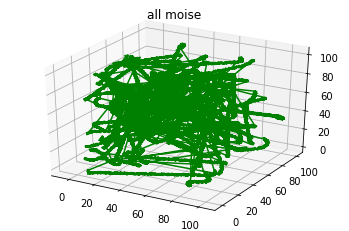

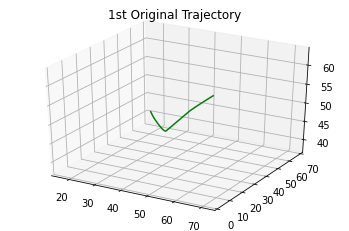

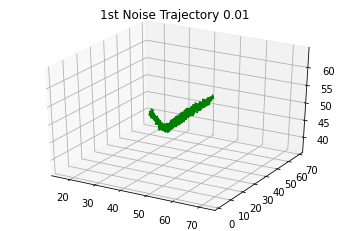

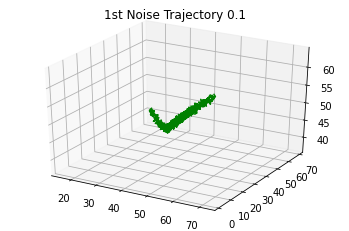

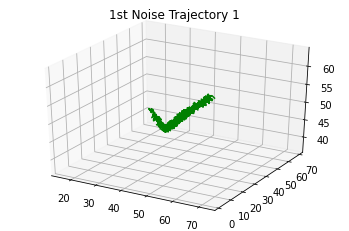

In [18]:
# plot 1st trajectory 
plot_trajectory(nos_p_1, 'all noise')
plot_trajectory(org_p_spl[0], '1st Original Trajectory')
plot_trajectory(nos_p_001_spl[0], '1st Noise Trajectory 0.01')
plot_trajectory(nos_p_01_spl[0], '1st Noise Trajectory 0.1')
plot_trajectory(nos_p_1_spl[0], '1st Noise Trajectory 1')

In [73]:
# try label no. = 10

init_mean = []
num = 5 # number of component in each diagonal

for i in range(num):
    for j in range(num):
        for k in range(num):
            init_mean.append([i * (100/num) + (50/num), j * (100/num) + (50/num), k * (100/num) + (50/num)])
#print(init_mean)   

a = datetime.datetime.now()
HMM_10 = hmm.GaussianHMM(n_components=125, covariance_type="spherical", init_params="sct", params="sct", n_iter=len(traj_lens), verbose=True)
HMM_10.means_ = init_mean
HMM_10.fit(org_p, traj_lens)
b = datetime.datetime.now()
print(b-a)

[[10.0, 10.0, 10.0], [10.0, 10.0, 30.0], [10.0, 10.0, 50.0], [10.0, 10.0, 70.0], [10.0, 10.0, 90.0], [10.0, 30.0, 10.0], [10.0, 30.0, 30.0], [10.0, 30.0, 50.0], [10.0, 30.0, 70.0], [10.0, 30.0, 90.0], [10.0, 50.0, 10.0], [10.0, 50.0, 30.0], [10.0, 50.0, 50.0], [10.0, 50.0, 70.0], [10.0, 50.0, 90.0], [10.0, 70.0, 10.0], [10.0, 70.0, 30.0], [10.0, 70.0, 50.0], [10.0, 70.0, 70.0], [10.0, 70.0, 90.0], [10.0, 90.0, 10.0], [10.0, 90.0, 30.0], [10.0, 90.0, 50.0], [10.0, 90.0, 70.0], [10.0, 90.0, 90.0], [30.0, 10.0, 10.0], [30.0, 10.0, 30.0], [30.0, 10.0, 50.0], [30.0, 10.0, 70.0], [30.0, 10.0, 90.0], [30.0, 30.0, 10.0], [30.0, 30.0, 30.0], [30.0, 30.0, 50.0], [30.0, 30.0, 70.0], [30.0, 30.0, 90.0], [30.0, 50.0, 10.0], [30.0, 50.0, 30.0], [30.0, 50.0, 50.0], [30.0, 50.0, 70.0], [30.0, 50.0, 90.0], [30.0, 70.0, 10.0], [30.0, 70.0, 30.0], [30.0, 70.0, 50.0], [30.0, 70.0, 70.0], [30.0, 70.0, 90.0], [30.0, 90.0, 10.0], [30.0, 90.0, 30.0], [30.0, 90.0, 50.0], [30.0, 90.0, 70.0], [30.0, 90.0, 90.0],

         1     -929436.3225             +nan
         2     -811602.7418     +117833.5807
         3     -737913.0352      +73689.7066
         4     -662957.1833      +74955.8519
         5     -632489.5403      +30467.6430
         6     -628819.3425       +3670.1978
         7     -628324.8250        +494.5175
         8     -628195.1181        +129.7069
         9     -628100.7291         +94.3890
        10     -628046.7426         +53.9865
        11     -628012.6418         +34.1008
        12     -627980.6238         +32.0181
        13     -627941.8800         +38.7437
        14     -627939.0591          +2.8210
        15     -627938.6346          +0.4244
        16     -627938.2607          +0.3739
        17     -627937.9603          +0.3004
        18     -627937.8000          +0.1603
        19     -627937.7159          +0.0841
        20     -627937.6582          +0.0576
        21     -627937.6142          +0.0440
        22     -627937.5819          +0.0323
        23

1:22:33.151093


        25     -627937.5372          +0.0088


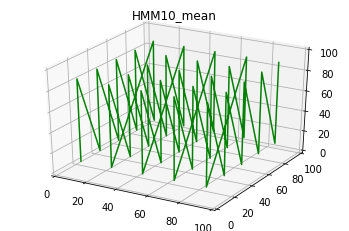

In [75]:
# plot means
plot_trajectory(HMM_10.means_, 'HMM10_mean')
#print(HMM_10.means_)

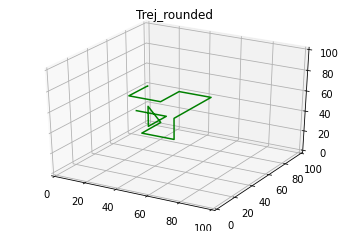

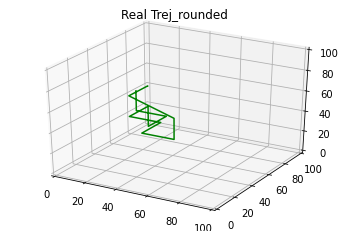

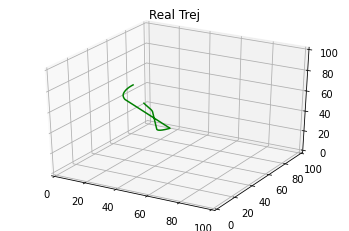

In [122]:
#select_traj = 77
connected_me = np.loadtxt('../Trajectory/data/connected_me.csv', delimiter=' ')

#replace = org_p_spl[select_traj]
#replacenew = connected_me[::10]
#replace = replacenew[0:100]
replace = nos_p_1[0:1000]
real= org_p[0:1000]

pred = HMM_10.predict(replace)
orig_rd = np.ceil(real/20)*20-10
trej_rd = []
trej = []

for point in pred:
    trej_rd.append(np.ceil(HMM_10.means_[point]/20)*20-10)
plot_trajectory(trej_rd, 'Trej_rounded')
plot_trajectory(orig_rd, 'Real Trej_rounded')

for point in pred:
    trej.append(HMM_10.means_[point])
#plot_trajectory(trej, 'Trej')
plot_trajectory(real, 'Real Trej')

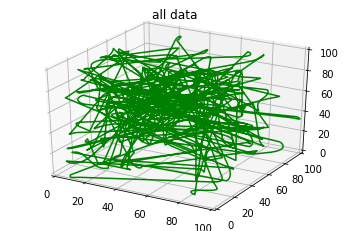

In [115]:

plot_trajectory(org_p, 'all data')

In [118]:
import pickle

with open("May03_5x5x5.pkl", "wb") as file: pickle.dump(HMM_10, file)
#with open("filename.pkl", "rb") as file: pickle.load(file)
#GaussianHMM(algorithm='viterbi', ...

In [123]:
traj = real
labels = np.zeros(len(traj))

def closest_node(node,nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2,axis=1)
    return np.argmin(dist_2)

for i,data in enumerate(traj):
    labels[i] = closest_node(data,init_mean)

print("model accuracy is: ", np.mean(labels == HMM_10.predict(traj)))

model accuracy is:  0.951
